In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def arange2(a, num):
    """numpy.ndarrayを最小と最大の間でnum+1分割する"""
    amin, amax = a.min(), a.max()
    return np.arange(amin, amax + 1e-8, (amax - amin) / num)


def plot_tree(clf, X, y, num=50, colors=('red', 'blue')):
    """
    X[:, 0]とX[:, 1]の2次元で、yの0-1ラベルによる散布図と
    予測（clf.predict）の等高線（contourf）を描画
    """
    from matplotlib.colors import ListedColormap
    xx0, xx1 = np.meshgrid(arange2(X[:, 0], num), arange2(X[:, 1], num))
    Z = clf.predict(np.array([xx0.ravel(), xx1.ravel()]).T).reshape(xx0.shape)
    plt.contourf(xx0, xx1, Z, alpha=0.4, cmap=ListedColormap(colors))
    for i in range(2):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, c=colors[i])
    plt.show()

In [2]:
# 1. データの読み込み
df = pd.read_csv('input/data14.csv')
df.head(3)

,x0,x1,y
0,6.882114,19.783782,0.0
1,28.853305,12.476423,0.0
2,2.147312,24.028004,0.0


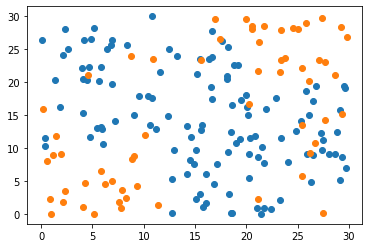

In [3]:
plt.scatter(df[df.y == 0].x0, df[df.y == 0].x1)
plt.scatter(df[df.y == 1].x0, df[df.y == 1].x1);

In [4]:
# 説明変数（X）と目的変数（y）の取得
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
# 3. トレーニング、テスト用のXとyに分割
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
# 4. 決定木で分類
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# テストデータでスコア算出
tree.score(X_test, y_test)

0.7222222222222222

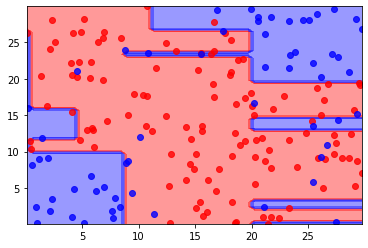

In [8]:
# 5. 結果をプロット
plot_tree(tree, X, y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_depth3 = DecisionTreeClassifier(max_depth=3)
tree_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
tree_depth3.score(X_test, y_test)

0.7592592592592593

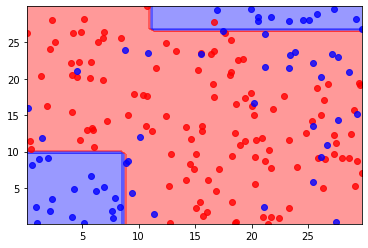

In [11]:
plot_tree(tree_depth3, X, y)

In [12]:
tree.score(X_train, y_train)

1.0

In [13]:
tree.score(X_test, y_test)

0.7222222222222222

In [14]:
tree_depth3.score(X_train, y_train)

0.8650793650793651

In [15]:
tree_depth3.score(X_test, y_test)

0.7592592592592593